<a href="https://colab.research.google.com/github/Flugrael/Admission_University/blob/main/Neural_Network_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

print(tf.__version__)

2.8.2


In [ ]:
df['sel']

NameError: ignored

In [ ]:

df = pd.read_csv("/content/data (1).csv", index_col = 0)
df = df.head(1500)

df.loc[df.sel == 'aufgenommen', 'sel']  = 1
df.loc[df.sel == 'nicht aufgenommen', 'sel']  = 0

df = df.dropna()

FileNotFoundError: ignored

In [ ]:
df 

NameError: ignored

In [ ]:
X = df.drop(['sel'], axis = 1) #independent variable
y = df['sel'] 
X = pd.get_dummies(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #train

NameError: ignored

# Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim = X.shape[1])) #classifier
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu')) #hidden layer
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) #output layer
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [ ]:
tf.random.set_seed(3)
classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer="Adam",
                             batch_size=32,
                             epochs=50)

history = classifier.fit(X_train, y_train, validation_split=0.2, verbose=1)

Epoch 1/50
30/30 [==============================] - 1s 8ms/step - loss: 0.6906 - accuracy: 0.5349 - val_loss: 0.6854 - val_accuracy: 0.5833
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5860 - val_loss: 0.6768 - val_accuracy: 0.7208
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.6298 - val_loss: 0.6545 - val_accuracy: 0.7208
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6705 - val_loss: 0.6120 - val_accuracy: 0.6833
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6736 - val_loss: 0.6170 - val_accuracy: 0.6750
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.6830 - val_loss: 0.5784 - val_accuracy: 0.7208
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7132 - val_loss: 0.5761 - val_accuracy: 0.7292
Epoch 8/50
30/30 [==

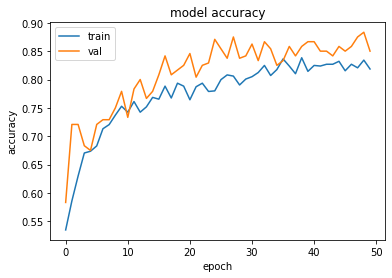

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('neural_network.png')
#plt.show()

In [ ]:
np.mean(history.history['val_accuracy']).mean()

0.8114166724681854

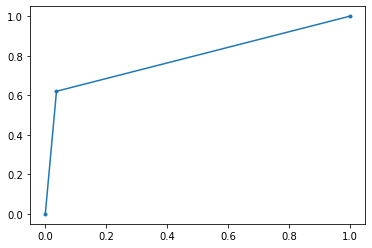

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test = np.array(y_test).astype(int)
y_pred = classifier.predict(X_test).ravel()
y_pred = y_pred.astype(int)
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.savefig('roc_nn.png')

# Multiple Layer Neural Network

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim= X.shape[1])) #classifier
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=64,kernel_initializer='uniform',activation='relu')) #hidden layer
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu')) #hidden layer
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) #output layer
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [ ]:
tf.random.set_seed(20)
classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer="Adam",
                             batch_size=64,
                             epochs=50)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #train

In [ ]:
tf.random.set_seed(20)
history = classifier.fit(X_train, y_train, validation_split=0.2, verbose=0)
preds = classifier.predict(X) #to choose the best classifier # training
np.mean(history.history['val_accuracy']).mean()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('neural_networkMNN.png')
plt.show()

NameError: ignored

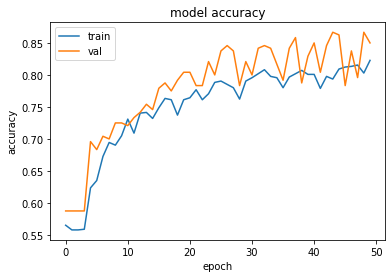

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('neural_networkMNN.png')
plt.show()

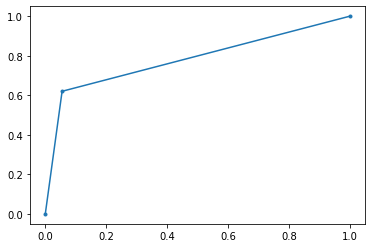

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test = np.array(y_test).astype(int)
y_pred = y_pred.astype(int)
y_pred = classifier.predict(X_test).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.savefig('roc_mnn.png')